Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\bV}{\mathbf{V}}$
$\newcommand{\bv}{\mathbf{v}}$
$\newcommand{\bG}{\mathbf{G}}$
$\newcommand{\bg}{\mathbf{g}}$
$\newcommand{\bZ}{\mathbf{Z}}$
$\newcommand{\bz}{\mathbf{z}}$
$\newcommand{\bmu}{\boldsymbol{\mu}}$
$\newcommand{\bT}{\mathbf{T}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 10: Redução de Dimensionalidade e Sistemas de Recomendação

Neste exercício, você irá investigar técnicas de redução de dimensionalidade, como análise de componentes principais (PCA) e redes neurais autoencoders, e aplicá-las em problemas de aprendizado de máquina como clustering e detecção de anomalias. Além disso, você irá investigar a técnica de filtragem colaborativa para sistemas de recomendação.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_data(X, X_rec=None):
    plt.plot(X[:, 0], X[:, 1], 'bo', ms=8, mec='k', mew=0.5)
    if X_rec is not None:
        for x, x_rec in zip(X, X_rec):
            plt.plot([x[0], x_rec[0]], [x[1], x_rec[1]], 'k--', lw=1)
        plt.plot(X_rec[:, 0], X_rec[:, 1], 'ro', ms=8, mec='k', mew=0.5)
    plt.axis('scaled')
    return

def display_data(X, n_cols=10, max_n_rows=6, scale=1.5):
    m, n = X.shape
    d = int(np.round(np.sqrt(n)))
    assert n == d**2
    n_rows = min(int(np.ceil(m/n_cols)), max_n_rows)
    plt.figure(figsize=(n_cols*scale, n_rows*scale))
    for i in range(min(m, n_rows*n_cols)):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(X[i].reshape(d,d), cmap=plt.cm.gray);
        plt.axis('off');
    return

# Redução de dimensionalidade

## 1. Conjunto de dados #1

Para ganhar experiência com PCA vamos começar analisando um conjunto de dados bidimensional simples.

(50, 2)


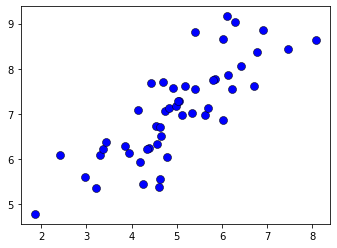

In [307]:
rng = np.random.RandomState(seed=0)
a = 2*np.pi*(40/360)
X = [5,7] + rng.randn(50,2) @ np.diag([1.5,0.5]) @ [[np.cos(a), np.sin(a)], [-np.sin(a), np.cos(a)]]
plot_data(X)
print(X.shape)

1. Rode o algoritmo PCA (`sklearn.decomposition.PCA`) com $K=n=2$ e obtenha o vetor de média $\bmu$, os autovetores $\bg_1,\ldots,\bg_n$ e seus respectivos autovalores $\lambda_1,\ldots,\lambda_n$. Em seguida, trace setas partindo do ponto de média e indo na direção/sentido dos autovetores, com comprimento igual à raiz quadrada dos respectivos autovalores.

#### Dicas
- Leia a [documentação do PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) e da função `plt.arrow`.
- Na álgebra linear, a convenção mais comum é tratar vetores como vetores-coluna. No entanto, para fins de programação, e em particular nas bibliotecas NumPy e sklearn, é mais conveniente trabalhar com vetores-linha. (Por exemplo, a $i$-ésima linha de uma matriz `X` pode ser obtida simplesmente como `X[i]`.) Em particular, a representação da matriz de autovetores no sklearn é a **transposta** da utilizada nos slides da aula. Assim, fique à vontade para trabalhar diretamente com a matriz $\bG^T$ (que pode ser atribuída, por exemplo, a uma variável `Gt`), a qual fornece os autovetores em suas linhas.

**Pré-processamento:**






In [308]:
# Analisando se os atributos estão centralizados, isto é, possuem média nula.
print('Mean',np.mean(X, axis = 0))
print('Std',np.std(X))

Mean [4.98626895 7.05558265]
Std 1.544097555605074


In [309]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
print('Mean',round(np.mean(X_scaled),2))
print('Std',round(np.std(X_scaled),2))

Mean -0.0
Std 1.0


**Algoritmo PCA**

In [310]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_scaled)
print(f'Mean',model.mean_)

Mean [-4.48183157e-16 -1.05526698e-15]


In [311]:
'''
  ===================================== PLT ARROW =========================================
  
  plt.arrow(x,y,dx,dy)
  x, y : The x and y coordinates of the arrow base.
  dx, dy : The length of the arrow along x and y direction. 

  ============================= PARA OBTER AS DUAS DIMENSÕES: =============================

  model.components_: principal axes in feature space, representing the directions of maximum variance in the data

  inverse_transform(X): Transform data back to its original space.

  transform(X): Apply dimensionality reduction to X.

  Componentes principais: K vetores estão ordenados aos K valores, logo, basta pegar as K primeiras colunas da matriz.
  G = V[:, :K] = [v1,...,vk]

'''
mean = np.mean(X_scaled, axis = 0)
#mean = np.mean(X, axis = 0)


autovetores = model.components_.T
autovalores = model.explained_variance_
print(autovetores)
print('\n',autovalores)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

 [1.84759393 0.1932224 ]


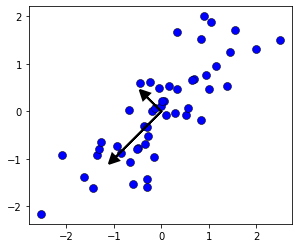

In [312]:
plot_data(X_scaled)
for i in range(2):
  plt.arrow(mean[0], mean[1],
            autovetores[0,i] * np.sqrt(autovalores[i]),
            autovetores[1,i] * np.sqrt(autovalores[i]),
            head_width=0.2, head_length=0.2, fc='k', lw=2, zorder=1000)

2. Projete os dados em $K=1$ dimensão, obtendo as coordenadas $\bz$ neste novo espaço (é mais fácil rodar o PCA novamente), e reconstrua os dados no espaço original ($n=2$) a partir destas coordenadas, i.e., aproxime os dados usando apenas a primeira componente principal. Em seguida, trace um gráfico ligando cada ponto original $\bx$ à sua projeção $\hat{\bx}$. Para isso, use a função `plot_data(X, X_rec)`.

In [326]:
from sklearn.decomposition import PCA
model = PCA(n_components=1)
model.fit(X_scaled)
print(f'Mean',model.mean_)

Mean [-4.48183157e-16 -1.05526698e-15]


In [327]:
autovetores = model.components_.T
autovalores = model.explained_variance_
print(autovetores)
print('\n',autovalores)

[[-0.70710678]
 [-0.70710678]]

 [1.84759393]


In [328]:
z = model.transform(X_scaled)
xx = model.inverse_transform(z)
print("")

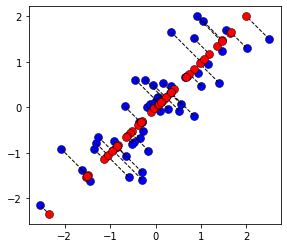

In [338]:
plot_data(X_scaled,xx)

3. (OPCIONAL) Treine uma rede neural autoencoder de 1 camada oculta com ativação linear e mostre que esse modelo é equivalente a um modelo PCA, no sentido de encontrar o mesmo subespaço gerado pelos componentes principais. Para isso, utilize uma única unidade na camada oculta e extraia os pesos do codificador através de `model.coefs_[0]`. Trace o gráfico desse vetor sobreposto ao conjunto de dados, assim como feito no item 1, e confirme que possui a mesma direção do primeiro componente principal. Lembre-se de centralizar (subtrair a média) do conjunto de dados antes de treinar a rede neural.

## 2. Conjunto de dados #2

O próximo conjunto de dados é uma versão redimensionada do conjunto [LFWcrop](https://conradsanderson.id.au/lfwcrop/) e consiste de imagens de faces com dimensões 32 x 32 em escala de cinza. O conjunto já está "achatado" em vetores de comprimento $n=1024$. 

In [516]:
import os
import wget
import h5py
filename = 'faces.h5'
if not os.path.exists(filename):
    wget.download('https://github.com/danilo-silva-ufsc/ml/raw/master/data/' + filename)
with h5py.File(filename, 'r') as file:
    X = file['X'][:]
print(X.shape, X.dtype)

(5000, 1024) int8


Um exemplo das primeiras 50 imagens é mostrado a seguir.

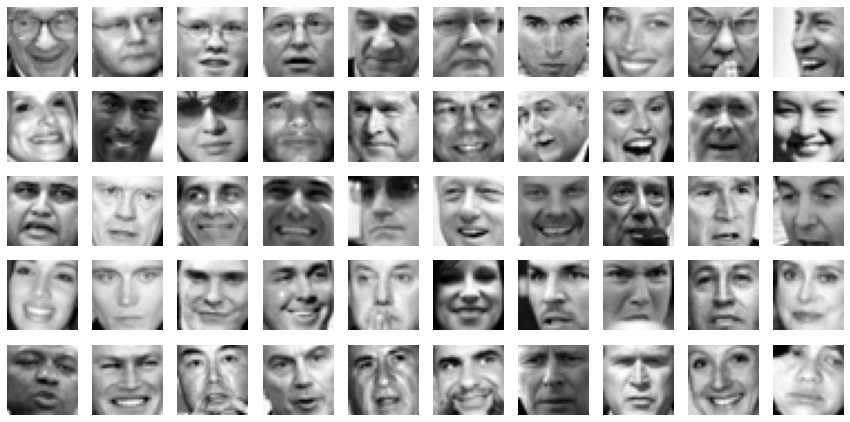

In [517]:
display_data(X[:50])

1. Rode o algoritmo PCA com K = 100 componentes. Visualize como uma imagem a média e os 39 primeiros componentes principais (em uma grade 4x10). Para isso, utilize a função `display_data`, que já efetua automaticamente a conversão para imagens e organiza em uma grade.

In [518]:
# Analisando se os atributos estão centralizados, isto é, possuem média nula.
print('Mean',np.mean(X, axis = 0))
print('Std',np.std(X))

Mean [-21.8742 -13.9692  -4.7132 ... -28.4606 -31.3982 -33.1028]
Std 44.26055605122021


In [519]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
print('Mean',round(np.mean(X_scaled),2))
print('Std',round(np.std(X_scaled),2))

Mean -0.0
Std 1.0


In [520]:
model = PCA(n_components=100)
model.fit(X_scaled)
print(f'Mean',model.mean_)

Mean [-9.59232693e-18 -1.14575016e-17  1.84030569e-16 ... -4.02344824e-17
  2.18047802e-17  4.49640325e-17]


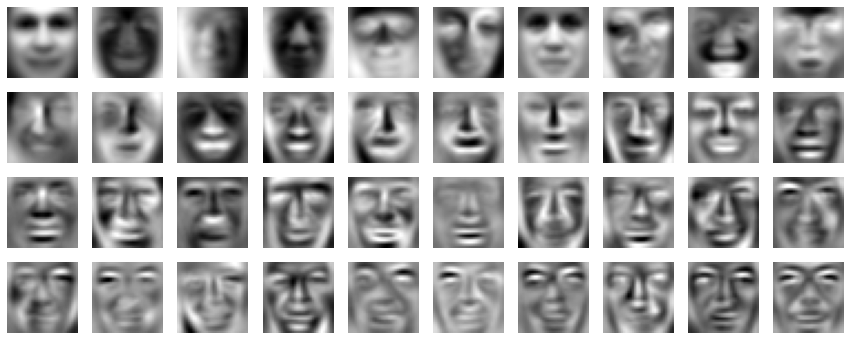

In [521]:
mean = np.mean(X, axis = 0)
mean = mean.reshape(1,-1)

autovetores = model.components_.T
autovetores = autovetores[:,:39].T  # como os vetores estão ordenados, pegamos as k primeiras colunas da matriz = componentes principais

new_size = np.r_[mean, autovetores]
print(new_size.shape)
display_data(new_size, n_cols=10, max_n_rows=10)

2. Ainda com K=100, transforme as imagens para o espaço de autovetores K-dimensional e em seguida as reconstrua no espaço original. Mostre a versão original e reconstruída das 10 primeiras imagens.

In [522]:
X_rec = model.transform(X_scaled)
X_rec = model.inverse_transform(X_rec)

from ipywidgets import interact
@interact(i=(0,9))
def _(i=0):
    display_data(X[10*i:10*i+10])
    display_data(X_rec[10*i:10*i+10])

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

3. Determine o número de componentes principais necessários para reter 99% da variância. Em seguida, trace um gráfico com a proporção de variância retida acumulada em função do número de componentes principais. (Obs: será um gráfico crescente.)

In [523]:
# modelo anterior
print(f'Variância: {round((sum(model.explained_variance_ratio_)),2)*100}%')

Variância: 93.0%


In [524]:
# n = 290
@interact(n=(0,500,10))
def _(n):
  model = PCA(n_components=n)
  model.fit(X_scaled)

  mean = np.mean(X, axis = 0)
  mean = mean.reshape(1,-1)

  autovetores = model.components_.T
  autovetores = autovetores[:,:39].T

  new_size = np.r_[mean, autovetores]
  new_size.shape
  print(f'Variância: {round((sum(model.explained_variance_ratio_)),2)*100}%')
  display_data(new_size, n_cols=10, max_n_rows=10)

interactive(children=(IntSlider(value=250, description='n', max=500, step=10), Output()), _dom_classes=('widge…

In [ ]:
  model = PCA(n_components=290)
  model.fit(X_scaled)

  mean = np.mean(X, axis = 0)
  mean = mean.reshape(1,-1)

  autovetores = model.components_.T
  autovetores = autovetores[:,:39].T

  new_size = np.r_[mean, autovetores]
  new_size.shape
  print(f'Variância: {round((sum(model.explained_variance_ratio_)),2)*100}%')
  display_data(new_size, n_cols=10, max_n_rows=10)

Em seguida, trace um gráfico com a proporção de variância retida acumulada em função do número de componentes principais. (Obs: será um gráfico crescente.)

In [ ]:
Em seguida, trace um gráfico com a proporção de variância retida acumulada em função do número de componentes principais. (Obs: será um gráfico crescente.)

4. (OPCIONAL) Encontre e mostre as 20 imagens mais próximas (em distância euclidiana) da imagem `X[25]` (obs: há outras 28 imagens dessa mesma pessoa nesse conjunto.) Para isso, use a função `kneighbors` da classe `sklearn.neighbors.NearestNeighbors`. 

5. Você acha que a extração de atributos via PCA pode fornecer uma representação melhor do que a original, no sentido de que a distância euclidiana no espaço transformado seja mais significativa (mais preditiva para tarefas de aprendizado) do que no espaço original? No caso específico de imagens, você consegue pensar em um modelo de extração de atributos melhor do que PCA?

As imagens perdem muitas características importantes utilizando PCA. Algum filtro de pre-processamento ou as camadas de uma CNN podem resolver o problema.

## 3. Conjunto de dados #3

1. Refaça o item 3.1 do Exercício 9 tendo antes pré-processado as imagens com PCA para reduzir sua dimensionalidade. O objetivo é acelerar o K-Means sem prejudicar significativamente os resultados. Meça a acurácia e o tempo decorrido na clusterização.
2. Trace um gráfico da acurácia e outro do tempo decorrido, ambos em função do número de componentes principais. Em torno de qual valor parece ser o número mais adequado de componentes para esta aplicação?

**EXERCÍCIO:**. Como os rótulos são conhecidos, é possível medir a acurácia do agrupamento tratando-o como um problema de classificação---a menos de uma permutação, pois o algoritmo de clustering não tem como adivinhar exatamente quais são os rótulos. Para fazer uma avaliação justa, você pode dar a um cluster o rótulo correspondente ao dígito que aparece com maior frequência no cluster. Além disso, você deve utilizar K=10.

1. Aplique o K-means no conjunto de dígitos MNIST e analise os clusters encontrados. Para isso:
 1. Calcule a [matriz de contingência](https://scikit-learn.org/stable/modules/clustering.html#contingency-matrix) (`sklearn.metrics.cluster.contingency_matrix`), cujo elemento $(j,k)$ indica o número de amostras de rótulo $j$ que foram alocadas ao cluster $k$.
 1. Determine o melhor mapeamento entre clusters e rótulos, i.e., um array `best_map` cujo elemento $k$ contém o índice do valor máximo coluna $k$. Note que pode haver valores repetidos.
 1. Considerando este mapeamento, determine a acurácia do agrupamento obtido.
 1. Visualize os centróides de cada cluster. Indique no título de cada imagem o dígito predito para este cluster (i.e., o rótulo mais frequente) e sua frequência de ocorrência dentro do cluster.

In [525]:
from sklearn.datasets import fetch_openml
X_full, y_full = fetch_openml('mnist_784', return_X_y=True)
y_full = y_full.astype('int8')
print(X_full.shape, y_full.shape)

(70000, 784) (70000,)


In [526]:
m = 3000
subset = np.random.RandomState(seed=0).permutation(X_full.shape[0])[:m]
X = X_full[subset]
y = y_full[subset]
print(X.shape, y.shape)

(3000, 784) (3000,)


In [527]:
np.mean(X)

33.522942602040814

**Pré-processamento utilizado PCA**

In [528]:
X_scaled = preprocessing.scale(X)
print('Mean',round(np.mean(X_scaled),2))
print('Std',round(np.std(X_scaled),2))

Mean -0.0
Std 0.91


In [529]:
# n = 290
@interact(n=(0,500,10))
def _(n):
  model = PCA(n_components=n)
  model.fit(X_scaled)

  mean = np.mean(X, axis = 0)
  mean = mean.reshape(1,-1)

  autovetores = model.components_.T
  autovetores = autovetores[:,:39].T

  new_size = np.r_[mean, autovetores]
  new_size.shape
  print(f'Variância: {round((sum(model.explained_variance_ratio_)),2)*100}%')
  display_data(new_size, n_cols=10, max_n_rows=10)

interactive(children=(IntSlider(value=250, description='n', max=500, step=10), Output()), _dom_classes=('widge…

In [536]:
model = PCA(n_components=400)
model.fit(X_scaled)

mean = np.mean(X, axis = 0)
mean = mean.reshape(1,-1)

autovetores = model.components_.T
autovetores = autovetores[:,:39].T

new_size = np.r_[mean, autovetores]
print(f'Variância: {round((sum(model.explained_variance_ratio_)),2)*100}%')

Variância: 99.0%


In [537]:
z = model.transform(X_scaled)
xx = model.inverse_transform(z)
print("")

In [540]:
from sklearn.cluster import KMeans

K = 10
model = KMeans(n_clusters=K)
model.fit(xx)

centroids = model.cluster_centers_
label = model.labels_

In [542]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix = contingency_matrix(y, model.predict(xx))
print(f'Matriz de Contingência:\n{contingency_matrix}')

Matriz de Contingência:
[[ 24   1   0   1   0  78   1  68 134   3]
 [  0 336   0   2   0   3   0   0   0   1]
 [ 18  44   2   2   4  87   5  25   1 109]
 [  2  27   3   8   8  60  14 148   0  13]
 [  5  16   2  90  30   1 148   0   2   3]
 [  1  36   0  65   6  26  13  89   0   8]
 [227  13   0   0   0   7   0   3  16  24]
 [  0  21  35 140   3   1 126   0   1   0]
 [  2  65   1  89  13  15  23 102   0   1]
 [  0  10   1  88  33   2 162   2   1   0]]


In [543]:
# amax = Return the maximum of an array or maximum along an axis.
# Axis = 0: maxima along the first axis
best_map = np.amax(contingency_matrix, axis = 0) #valor máximo coluna k
best_map

array([227, 336,  35, 140,  33,  87, 162, 148, 134, 109])

In [544]:
print(f'Accuracy: {(round(np.sum(best_map)/ np.sum(contingency_matrix),2))*100} %')

Accuracy: 47.0 %


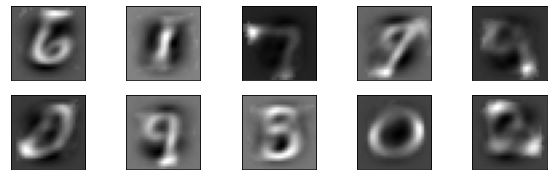

In [546]:
fig,ax = plt.subplots(2,5,figsize=(10,3))
centers = centroids.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

## 4. Conjunto de dados #4

O próximo conjunto consiste de dados de transações de cartão de crédito, disponível em:

https://www.kaggle.com/mlg-ulb/creditcardfraud

O objetivo é identificar transações fradulentas. Os atributos consistem do rótulo da transação ($y=1$ corresponde a uma transação fradulenta) e 30 atributos de entrada, sendo que destes 28 correspondem às componentes principais dos atributos originais, os quais não são fornecidos por uma questão de confidencialidade. (Incidentalmente, este conjunto ilustra mais uma aplicação de PCA: anonimização.)

O conjunto é formado por 284807 amostras, sendo destas 492 fradulentas (anômalas). Separe 2/3 das amostras normais como conjunto de treinamento, e como conjunto de validação utilize todas as amostras anômalas e as restantes 1/3 de amostras normais, conforme proposto em:

https://www.dataversity.net/fraud-detection-using-a-neural-autoencoder/

O treinamento deve ser feito usando exclusivamente o conjunto de treinamento, enquanto o conjunto de validação deve ser usado para selecionar o limiar de classificação que maximiza o score F1.

Primeiramente, treine um modelo gaussiano, que servirá como baseline de comparação.

Em seguida, desenvolva um modelo usando uma rede autoencoder (utilizando Keras), com desempenho superior ao modelo gaussiano. Fique à vontade para utilizar múltiplas camadas e funções de ativação.

Para desenvolver e testar a rede autoencoder, separe como conjunto de teste (ou, mais precisamente, validação dessa etapa) uma fração de 10% do conjunto de treinamento, conforme proposto no link acima.

Reporte os resultados obtidos. Comente.

### Dicas
- Pode ser útil normalizar os dados.
- Experimente também excluir atributos.

In [555]:
from google.colab import files
files.upload()

Saving archive.zip to archive (1).zip


In [562]:
!unzip credit.zip

Archive:  credit.zip
  inflating: creditcard.csv          


In [698]:
import pandas as pd
# Download data from Kaggle
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [699]:
X = df.to_numpy()[:,:-1]
y = df.to_numpy()[:,-1]

print(X.shape, y.shape)

(284807, 30) (284807,)


**Amostras fraudulentas**


In [700]:
df_fr = df[df['Class'] == 1]
X_fr = df_fr.to_numpy()[:,:-1]
y_fr = df_fr.to_numpy()[:,-1]
print(X_fr.shape)
print(y_fr.shape)
df_fr.head()

(492, 30)
(492,)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


**Amostras de treino**

In [701]:
df_train = df
df_train.shape

(284807, 31)

O df sem as amostras anômalas deverá ter 284807 - 492 = 284315

In [702]:
idx_fraude = df_fr.index
df_train = df_train.drop(idx_fraude, axis = 0)
print("Train shape:", df_train.shape)

Train shape: (284315, 31)


In [703]:
# Conferindo...
df_train.loc[df_train.Class == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [704]:
xtemp_train = df_train.to_numpy()[:,:-1]
ytemp_train = df_train.to_numpy()[:,-1]
print(xtemp_train.shape)
print(ytemp_train.shape)

(284315, 30)
(284315,)


Separe 2/3 das amostras normais como conjunto de treinamento, e como conjunto de validação utilize todas as amostras anômalas e as restantes 1/3 de amostras normais, conforme proposto em:

In [705]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(xtemp_train, ytemp_train, test_size=1/3, random_state=42)

In [706]:
print('========== DADOS A SEREM FILTRADOS ==========\n')
print('X shape: ',X_train.shape)
print('y shape: ' ,y_train.shape)
print('X val shape: ',X_val.shape)
print('y val shape: ',y_val.shape)

========== DADOS A SEREM FILTRADOS ==========

X shape:  (189543, 30)
y shape:  (189543,)
X val shape:  (94772, 30)
y val shape:  (94772,)


In [707]:
print(X_fr.shape)
print(y_fr.shape)

(492, 30)
(492,)


In [708]:
X_val = np.r_[X_val,X_fr]
y_val = np.r_[y_val,y_fr]

In [709]:
print('========== DADOS FILTRADOS ==========\n')

print('X shape: ',X_train.shape)
print('y shape: ' ,y_train.shape)
print('X val shape: ',X_val.shape)
print('y val shape: ',y_val.shape)

========== DADOS FILTRADOS ==========

X shape:  (189543, 30)
y shape:  (189543,)
X val shape:  (95264, 30)
y val shape:  (95264,)


284807

# Sistemas de recomendação

Nesta parte do exercício iremos utilizar o Keras para implementar um sistema de recomendação. Um exemplo é mostrado abaixo (conjunto de dados retirado dos slides).

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam

n_users = 4
n_items = 5

title = {0: 'Star Wars',
         1: 'Matrix',
         2: 'X-Men',
         3: 'Titanic',
         4: 'Casablanca'}

# [user, item, rating]
data = np.array([[0,0,0],
                 [0,1,0],
                 [0,3,4],
                 [1,0,5],
                 [1,1,5],
                 [1,3,0],
                 [1,4,0],
                 [2,0,5],
                 [2,2,4],
                 [2,3,0],
                 [2,4,0],
                 [3,0,0],
                 [3,2,0],
                 [3,3,5],
                 [3,4,5]])

x = data[:,[0,1]]
y = data[:,2]

n_factors = 2

def get_model():
    x = Input(shape=(2,), dtype='int64')
    z1 = Embedding(n_users, n_factors, name='user_embedding')(x[:,0])
    z1 = Flatten()(z1)
    z2 = Embedding(n_items, n_factors, name='item_embedding')(x[:,1])
    z2 = Flatten()(z2)
    y = Dot(axes=1)([z1, z2])
    model = Model(inputs=x, outputs=y)
    return model

get_model().summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice (Tens [(None,)]            0           input_1[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_1 (Te [(None,)]            0           input_1[0][0]                    
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 2)            8           tf_op_layer_strided_slice[0][0]  
_______________________________________________________________________________________

In [ ]:
model = get_model()
model.compile(loss='mse', optimizer=Adam(lr=0.1))
history = model.fit(x, y, epochs=80)

Epoch 1/80
1/1 [==============================] - 0s 998us/step - loss: 10.4675
Epoch 2/80
1/1 [==============================] - 0s 998us/step - loss: 10.4462
Epoch 3/80
1/1 [==============================] - 0s 2ms/step - loss: 10.3113
Epoch 4/80
1/1 [==============================] - 0s 999us/step - loss: 10.1084
Epoch 5/80
1/1 [==============================] - 0s 997us/step - loss: 9.8134
Epoch 6/80
1/1 [==============================] - 0s 998us/step - loss: 9.4042
Epoch 7/80
1/1 [==============================] - 0s 2ms/step - loss: 8.8784
Epoch 8/80
1/1 [==============================] - 0s 2ms/step - loss: 8.2360
Epoch 9/80
1/1 [==============================] - 0s 2ms/step - loss: 7.4829
Epoch 10/80
1/1 [==============================] - 0s 2ms/step - loss: 6.6334
Epoch 11/80
1/1 [==============================] - 0s 2ms/step - loss: 5.7094
Epoch 12/80
1/1 [==============================] - 0s 997us/step - loss: 4.7411
Epoch 13/80
1/1 [==============================] - 0s 999

In [ ]:
for i in [2, 4]:
    print("Alice's predicted rating for {}:".format(title[i]), model.predict(np.array([[0,i]])).squeeze())

Alice's predicted rating for X-Men: 0.021715641
Alice's predicted rating for Casablanca: 3.9593327


In [ ]:
# Matrix of item embeddings
Q = model.get_layer('item_embedding').weights[0].numpy()

In [ ]:
from sklearn.neighbors import NearestNeighbors

i = 3
K = 2
nbrs = NearestNeighbors(n_neighbors=K).fit(Q)
_, indices = nbrs.kneighbors(Q[[i]])
print('The {} most similar to {} (including itself) are:'.format(K, title[i]))
for j in indices[0]:
    print(title[j])

The 2 most similar to Titanic (including itself) are:
Titanic
Casablanca


In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2)
cluster.fit(Q)
for k in range(cluster.n_clusters):
    print('Cluster {}:'.format(k))
    for i in np.where(cluster.labels_ == k)[0]:
        print(title[i])
    print()

Cluster 0:
Star Wars
Matrix
X-Men

Cluster 1:
Titanic
Casablanca



## Conjunto de dados #4

1. Baseado no exemplo acima, desenvolva um modelo de predição para o conjunto de dados [MovieLens Latest Small](https://grouplens.org/datasets/movielens), o qual consiste de 100836 avaliações de 9742 filmes feitas por 610 usuários entre março de 1996 e setembro de 2018 (leia mais na [documentação](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)). Certifique-se de separar o conjunto em 90% de treinamento e 10% de validação e meça o MSE de validação.

2. (OPCIONAL) Para melhorar o desempenho do modelo, introduza *biases* de usuários e de filmes, bem como um *bias* geral. Outra técnica que ajuda é restringir os valores da saída através de uma função sigmóide, naturalmente escalonada para a faixa de interesse. Veja se consegue alcançar um MSE de validação de aproximadamente 0.74.

3. (OPCIONAL) Explore o modelo obtido: forneça as 10 melhores recomendações para algum usuário, encontre filmes similares a um dado filme e encontre clusters de filmes semelhantes.

#### Dicas
- Será necessário aplicar um codificador como o `sklearn.preprocessing.OrdinalEncoder(dtype=int)` para converter o conjunto de usuários e o conjunto de itens em inteiros consecutivos a partir de zero, pois isso é assumido pela camada de Embedding do Keras (em particular, os índices dos filmes não são consecutivos).
- As seguintes camadas do Keras podem ser úteis: `Add` e `Lambda`.

In [ ]:
from zipfile import ZipFile
from tensorflow.keras.utils import get_file
filename = 'ml-latest-small.zip'
url = 'http://files.grouplens.org/datasets/movielens/' + filename
with ZipFile(get_file(filename, url)) as z:
    movies = pd.read_csv(z.open('ml-latest-small/movies.csv'), index_col=0)
    data = pd.read_csv(z.open('ml-latest-small/ratings.csv'), usecols=[0,1,2])

In [ ]:
def search(query):
    return movies[movies.title.str.contains(query, case=False)]

In [ ]:
# from title to movieId
search('matrix')

,title,genres
movieId,,
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6934,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
27660,"Animatrix, The (2003)",Action|Animation|Drama|Sci-Fi


In [ ]:
# from movieId to title
movies.title[2571]

'Matrix, The (1999)'

In [ ]:
# ratings
data

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0
